## IMPORT DATASET

This data is available on https://www.kaggle.com/competitions/hbku2019/data?select=imgs.zip

In [1]:
#install kaggle
! pip install -q kaggle

#upload json file which is downloaded from kaggle.com/Account
from google.colab import files
files.upload()

#create a kaggle folder
! mkdir ~/.kaggle

#copy the kaggle.json to the created folder
! cp kaggle.json ~/.kaggle/

#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

# API for downloading the data
! kaggle competitions download -c hbku2019

Saving kaggle.json to kaggle.json
100% 5.11G/5.13G [00:22<00:00, 324MB/s]
100% 5.13G/5.13G [00:22<00:00, 249MB/s]


In [2]:
import tensorflow as tf
print(f"Available device : {tf.test.gpu_device_name()}")

Available device : /device:GPU:0


In [3]:
#unzip the zip file naming multi-label-image-classification-dataset.zip
!unzip hbku2019.zip

Archive:  hbku2019.zip
  inflating: Cocos_Baseline.ipynb    
  inflating: Cocos_Baseline_v1.ipynb  
  inflating: imgs.zip                
  inflating: labels.zip              


In [4]:
#unzip the zip file naming labels.zip
!unzip labels.zip
#unzip the zip file naming imgs.zip
!unzip imgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/000000004350.jpg  
  inflating: imgs/train/000000093331.jpg  
  inflating: imgs/train/000000038035.jpg  
  inflating: imgs/train/000000081554.jpg  
  inflating: imgs/train/000000064877.jpg  
  inflating: imgs/train/000000039650.jpg  
  inflating: imgs/train/000000039673.jpg  
  inflating: imgs/train/000000034394.jpg  
  inflating: imgs/train/000000016580.jpg  
  inflating: imgs/train/000000038782.jpg  
  inflating: imgs/train/000000055664.jpg  
  inflating: imgs/train/000000073556.jpg  
  inflating: imgs/train/000000046338.jpg  
  inflating: imgs/train/000000018175.jpg  
  inflating: imgs/train/000000006540.jpg  
  inflating: imgs/train/000000037624.jpg  
  inflating: imgs/train/000000083168.jpg  
  inflating: imgs/train/000000072557.jpg  
  inflating: imgs/train/000000037659.jpg  
  inflating: imgs/train/000000034792.jpg  
  inflating: imgs/train/000000022068.jpg  
  inflating: imgs/train/000000012715.jpg  
  i

## Import Required Library

In [1]:
import numpy as np
import random as ran
import pandas as pd
import os

#For plotting
%pylab inline
import matplotlib.pyplot as plt

#For split the data for train and validation
from sklearn.model_selection import train_test_split

#For viewing image
from PIL import Image

#For computing time
from datetime import datetime

#For model and their corresponding
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

#Resize the image
from keras.preprocessing import image

# from keras.preprocessing import image_dataset

# Progress bar
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_image_path = '/content/imgs/train/'
test_image_path = '/content/imgs/test/'
category_csv_path = '/content/labels/categories.csv'
labels_csv_path = '/content/labels/labels_train.csv'

In [3]:
Y_label = pd.read_csv(labels_csv_path, header = None)
#For lack of storage we take 70000 data points
Y_label = Y_label.iloc[:15000]  
print(Y_label.head())

                 0    1    2    3    4    5    6    7    8    9   ...   71  \
0  000000000001.jpg  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1  000000000002.jpg  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2  000000000004.jpg  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3  000000000005.jpg  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4  000000000006.jpg  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

    72   73   74   75   76   77   78   79   80  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 81 columns]


In [4]:
category = pd.read_csv(category_csv_path, header = None)
category = list(category[0])
print(category)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
print(f"Shape of label of the train dataset : {Y_label.shape}")

Shape of label of the train dataset : (15000, 81)


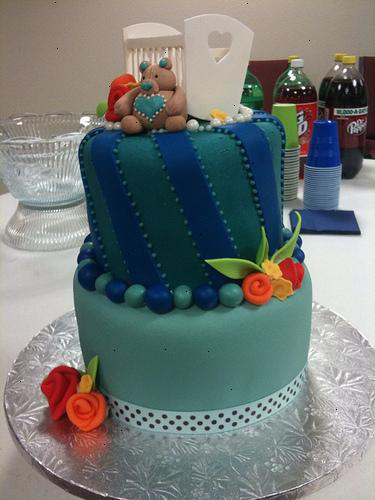

In [6]:
train_im = os.listdir(train_image_path)
Image.open(train_image_path + train_im[0])

In [7]:
im1 = Image.open(train_image_path + train_im[0])
width1, height1 = im1.size
im2 = Image.open(train_image_path + train_im[1])
width2, height2 = im2.size
im3 = Image.open(train_image_path + train_im[2])
width3, height3 = im3.size
print(f"Dimension of {train_im[0]} is {width1} * {height1}")
print(f"Dimension of {train_im[1]} is {width2} * {height2}")
print(f"Dimension of {train_im[2]} is {width3} * {height3}")

Dimension of 000000056490.jpg is 375 * 500
Dimension of 000000087275.jpg is 629 * 472
Dimension of 000000116906.jpg is 454 * 681


In [8]:
print(f"No. of image in the image set : {len(os.listdir(train_image_path))}")
print(f"No. of the data provided for image in the .csv file : {Y_label.shape[0]}")

No. of image in the image set : 97774
No. of the data provided for image in the .csv file : 15000


In [9]:
'''Need to read images using the tag from metadata. Otherwise, if read directly from the folder 
then images may not correspond to the metadata from the csv file.'''
SIZE = 100
X_dataset = []

for i in tqdm(range( Y_label.shape[0])):
    img = image.load_img(train_image_path + Y_label[0][i] , target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

100%|██████████| 15000/15000 [01:37<00:00, 153.67it/s]


In [10]:
'''X_dataset needs to convert to numpy array'''
X = np.array(X_dataset)

In [11]:
'''Id of image(lies in first column) are not labels to be trained. So drop it from the dataframe.
No need to convert to categorical as the dataset is already in the right format'''
y_class = Y_label.drop([0], axis=1)

In [12]:
print(X.shape)
print(y_class.shape)
print(y_class.head())

(15000, 100, 100, 3)
(15000, 80)
    1    2    3    4    5    6    7    8    9    10  ...   71   72   73   74  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    75   76   77   78   79   80  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 80 columns]


In [13]:
y = np.array(y_class)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.25)

In [15]:
print('Training Features Shape: ', X_train.shape)
print('Training Labels Shape: ', y_train.shape)
print('Testing Features Shape: ', X_test.shape)
print('Testing Labels Shape: ', y_test.shape)

Training Features Shape:  (11250, 100, 100, 3)
Training Labels Shape:  (11250, 80)
Testing Features Shape:  (3750, 100, 100, 3)
Testing Labels Shape:  (3750, 80)


In [16]:
model1 = keras.Sequential(
     [
      keras.Input(shape = (SIZE, SIZE, 3)),
      layers.Conv2D(filters = 6, kernel_size = (3, 3), padding = 'valid', activation = 'relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(pool_size = (2, 2)),
      layers.Dropout(0.2),

      layers.Flatten(),
      layers.Dense(80, activation='sigmoid')
     ]
)
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 6)         168       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 6)        24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 6)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 6)         0         
                                                                 
 flatten (Flatten)           (None, 14406)             0         
                                                                 
 dense (Dense)               (None, 80)                1

In [17]:
model1.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics= ['accuracy']
)

In [18]:
start = datetime.now()

history = model1.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=64)

end = datetime.now()
print(f"Total time for training is {end - start}")

Epoch 1/20
141/141 [==============================] - 14s 17ms/step - loss: 0.1850 - accuracy: 0.3203 - val_loss: 0.1327 - val_accuracy: 0.4267
Epoch 2/20
141/141 [==============================] - 2s 13ms/step - loss: 0.1105 - accuracy: 0.3731 - val_loss: 0.1295 - val_accuracy: 0.4231
Epoch 3/20
141/141 [==============================] - 2s 12ms/step - loss: 0.0818 - accuracy: 0.3738 - val_loss: 0.1326 - val_accuracy: 0.4049
Epoch 4/20
141/141 [==============================] - 2s 12ms/step - loss: 0.0564 - accuracy: 0.3834 - val_loss: 0.1526 - val_accuracy: 0.3462
Epoch 5/20
141/141 [==============================] - 2s 12ms/step - loss: 0.0403 - accuracy: 0.3886 - val_loss: 0.1830 - val_accuracy: 0.3173
Epoch 6/20
141/141 [==============================] - 2s 13ms/step - loss: 0.0311 - accuracy: 0.4001 - val_loss: 0.2238 - val_accuracy: 0.3213
Epoch 7/20
141/141 [==============================] - 2s 13ms/step - loss: 0.0255 - accuracy: 0.4074 - val_loss: 0.2533 - val_accuracy: 0.213

In [19]:
print(f"Train accuracy is {history.history['accuracy'][-1] * 100} and validation accuracy is {history.history['val_accuracy'][-1] * 100}")

Train accuracy is 41.66666567325592 and validation accuracy is 23.333333432674408


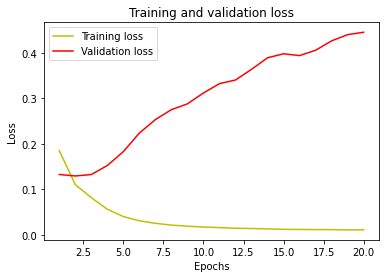

In [20]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

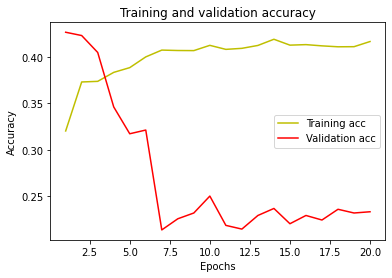

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
_, acc = model1.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

118/118 [==============================] - 1s 5ms/step - loss: 0.4603 - accuracy: 0.2283
Accuracy =  22.82666712999344 %


In [23]:
Data = pd.DataFrame({'Train Accuracy' : history.history['accuracy'], 'validation Accuracy' : history.history['val_accuracy'],
                     'Train Loss' : history.history['loss'], 'validation_Loss' : history.history['val_loss']})
print(Data)

    Train Accuracy  validation Accuracy  Train Loss  validation_Loss
0         0.320333             0.426667    0.184977         0.132739
1         0.373111             0.423111    0.110531         0.129527
2         0.373778             0.404889    0.081780         0.132603
3         0.383444             0.346222    0.056353         0.152570
4         0.388556             0.317333    0.040264         0.183018
5         0.400111             0.321333    0.031066         0.223821
6         0.407444             0.213778    0.025548         0.253313
7         0.407000             0.225778    0.021592         0.275192
8         0.406889             0.232000    0.019260         0.287893
9         0.412556             0.250222    0.017354         0.311811
10        0.408222             0.218667    0.016124         0.332281
11        0.409333             0.214667    0.014641         0.340273
12        0.412444             0.229333    0.014074         0.363684
13        0.419111             0.2

## Validate on an image

tv : (0.184)
vase : (0.184)
fork : (0.127)
bicycle : (0.099)
laptop : (0.0922)
suitcase : (0.0404)
refrigerator : (0.0213)
dog : (0.013)
clock : (0.0124)
fire hydrant : (0.00282)


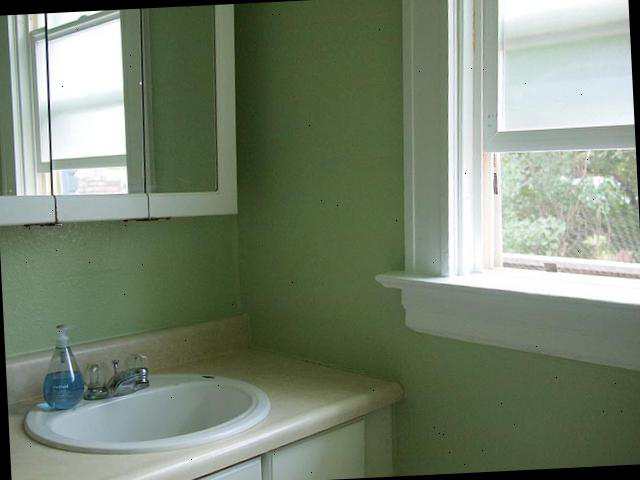

In [24]:
#Validate on an image

a = os.listdir(test_image_path)[1]
# Image.open(test_image_path + a)
img = image.load_img(test_image_path + a, target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
img = np.expand_dims(img, axis=0)

classes = np.array(Y_label.columns[1:]) #Get array of all classes
probability = model1.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(probability[0])[:-11:-1]  #Get class names for top 10 categories

#Print classes and corresponding probabilities

for i in range(10):
    print("{}".format(category[classes[sorted_categories[i]]])+ " : ({:.3})".format(probability[0][sorted_categories[i]]))
Image.open(test_image_path + a)